In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('energy_data.csv')
# Print the column names
print(df.columns)

Index(['Unnamed: 0', 'id', 'timestamp_edge', 'timestamp_inserted', 'device_id',
       'output_power_kW', 'output_current_A', 'energy_counter_MWh',
       'net_frequency_Hz', 'net_AC_voltage_V', 'DC_voltage_DCV',
       'average_cosphii_percent', 'status', 'start_conditions',
       'timestamp_edge_local', 'energy_counter_kWh', 'todays_energy_kWh',
       'yesterdays_energy_kWh', 'time_run_total_h', 'time_run_today_h',
       'time_run_yesterday_h', 'last_active_fault', 'grid_connections',
       'temperature_C', 'specific_unit_monitoring', 'last_active_fault_name',
       'irradiance', 'ambient_temperature'],
      dtype='object')


C:\Users\golum\AppData\Local\Temp\ipykernel_15468\1487691957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = df[['timestamp_edge', 'device_id',
       'output_power_kW', 'output_current_A', 'energy_counter_MWh',
       'net_frequency_Hz', 'net_AC_voltage_V', 'DC_voltage_DCV',
       'average_cosphii_percent', 'todays_energy_kWh',
       'yesterdays_energy_kWh', 'time_run_total_h', 'time_run_today_h',
       'time_run_yesterday_h', 'last_active_fault', 'grid_connections',
       'temperature_C', 'irradiance', 'ambient_temperature']]

In [4]:
# Check for missing values
print(df.isnull().sum())

timestamp_edge               0
device_id                    0
output_power_kW              0
output_current_A             0
energy_counter_MWh           0
net_frequency_Hz             0
net_AC_voltage_V             0
DC_voltage_DCV               0
average_cosphii_percent      0
todays_energy_kWh            0
yesterdays_energy_kWh        0
time_run_total_h             0
time_run_today_h             0
time_run_yesterday_h         0
last_active_fault            0
grid_connections             0
temperature_C                0
irradiance                 437
ambient_temperature        437
dtype: int64


In [3]:
df = df.dropna()

In [4]:
from sklearn.preprocessing import MinMaxScaler

outliers = df[df['output_power_kW'] > df['output_power_kW'].quantile(0.99)]
df = df[~df.index.isin(outliers.index)]

In [5]:
# Extract date and time information
df['date'] = pd.to_datetime(df['timestamp_edge']).dt.date
df['hour'] = pd.to_datetime(df['timestamp_edge']).dt.hour

# Calculate additional features
df['day_of_week'] = pd.to_datetime(df['timestamp_edge']).dt.day_name()
df['month'] = pd.to_datetime(df['timestamp_edge']).dt.month
df['year'] = pd.to_datetime(df['timestamp_edge']).dt.year

# Engineer features based on domain knowledge
df['sun_elevation_estimate'] = df['irradiance'] / df['ambient_temperature']

In [6]:
df.columns

Index(['timestamp_edge', 'device_id', 'output_power_kW', 'output_current_A',
       'energy_counter_MWh', 'net_frequency_Hz', 'net_AC_voltage_V',
       'DC_voltage_DCV', 'average_cosphii_percent', 'todays_energy_kWh',
       'yesterdays_energy_kWh', 'time_run_total_h', 'time_run_today_h',
       'time_run_yesterday_h', 'last_active_fault', 'grid_connections',
       'temperature_C', 'irradiance', 'ambient_temperature', 'date', 'hour',
       'day_of_week', 'month', 'year', 'sun_elevation_estimate'],
      dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Select relevant features and target variable
features = ['output_current_A', 'energy_counter_MWh', 'net_frequency_Hz',
            'net_AC_voltage_V', 'DC_voltage_DCV', 'average_cosphii_percent',
            'todays_energy_kWh', 'yesterdays_energy_kWh',
            'time_run_total_h', 'time_run_today_h', 'time_run_yesterday_h',
            'grid_connections', 'temperature_C', 'irradiance', 'ambient_temperature',
            'hour', 'day_of_week', 'month', 'year', 'sun_elevation_estimate'] # Include other relevant features

target = 'output_power_kW'
all_columns = features
all_columns.append(target)
df = df[all_columns]
# Label encode day_of_week variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df

,output_current_A,energy_counter_MWh,net_frequency_Hz,net_AC_voltage_V,DC_voltage_DCV,average_cosphii_percent,todays_energy_kWh,yesterdays_energy_kWh,time_run_total_h,time_run_today_h,...,grid_connections,temperature_C,irradiance,ambient_temperature,hour,day_of_week,month,year,sun_elevation_estimate,output_power_kW
437,0.0,20585.5,0.0,0.0,0.0,0.0,10610.0,10430.0,28925.0,10.0,...,8850.0,0.0,0.0,24.0,20,1,11,2024,0.0,0.0
438,0.0,20585.5,0.0,0.0,0.0,0.0,10610.0,10430.0,28925.0,10.0,...,8850.0,0.0,0.0,24.0,20,1,11,2024,0.0,0.0
439,0.0,20585.5,0.0,0.0,0.0,0.0,10610.0,10430.0,28925.0,10.0,...,8850.0,0.0,0.0,24.0,20,1,11,2024,0.0,0.0
440,0.0,20585.5,0.0,0.0,0.0,0.0,10610.0,10430.0,28925.0,10.0,...,8850.0,0.0,0.0,24.0,20,1,11,2024,0.0,0.0
441,0.0,20585.5,0.0,0.0,0.0,0.0,10610.0,10430.0,28925.0,10.0,...,8850.0,0.0,0.0,24.0,20,1,11,2024,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,0.0,20590.9,0.0,0.0,0.0,0.0,4690.0,90.0,28940.0,6.0,...,8856.0,0.0,0.0,23.0,12,3,12,2024,0.0,0.0
4294,0.0,20590.9,0.0,0.0,0.0,0.0,4690.0,90.0,28940.0,6.0,...,8856.0,0.0,0.0,23.0,12,3,12,2024,0.0,0.0
4295,0.0,20590.9,0.0,0.0,0.0,0.0,4690.0,90.0,28940.0,6.0,...,8856.0,0.0,0.0,23.0,12,3,12,2024,0.0,0.0
4296,0.0,20590.9,0.0,0.0,0.0,0.0,4690.0,90.0,28940.0,6.0,...,8856.0,0.0,0.0,23.0,12,3,12,2024,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3822 entries, 437 to 4297
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   output_current_A         3822 non-null   float64
 1   energy_counter_MWh       3822 non-null   float64
 2   net_frequency_Hz         3822 non-null   float64
 3   net_AC_voltage_V         3822 non-null   float64
 4   DC_voltage_DCV           3822 non-null   float64
 5   average_cosphii_percent  3822 non-null   float64
 6   todays_energy_kWh        3822 non-null   float64
 7   yesterdays_energy_kWh    3822 non-null   float64
 8   time_run_total_h         3822 non-null   float64
 9   time_run_today_h         3822 non-null   float64
 10  time_run_yesterday_h     3822 non-null   float64
 11  grid_connections         3822 non-null   float64
 12  temperature_C            3822 non-null   float64
 13  irradiance               3822 non-null   float64
 14  ambient_temperature      38

In [9]:
# Scale numerical features (optional but often beneficial)
scaler = MinMaxScaler()
numerical_cols = ['output_current_A', 'energy_counter_MWh', 'net_frequency_Hz',
                  'net_AC_voltage_V', 'DC_voltage_DCV', 'average_cosphii_percent',
                  'todays_energy_kWh', 'yesterdays_energy_kWh',
                  'time_run_total_h', 'time_run_today_h', 'time_run_yesterday_h',
                  'grid_connections', 'temperature_C', 'irradiance', 'ambient_temperature', 'sun_elevation_estimate']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

,output_current_A,energy_counter_MWh,net_frequency_Hz,net_AC_voltage_V,DC_voltage_DCV,average_cosphii_percent,todays_energy_kWh,yesterdays_energy_kWh,time_run_total_h,time_run_today_h,...,grid_connections,temperature_C,irradiance,ambient_temperature,hour,day_of_week,month,year,sun_elevation_estimate,output_power_kW
437,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.983035,0.999482,1.0,...,0.999322,0.0,0.0,0.166667,20,1,11,2024,0.0,0.0
438,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.983035,0.999482,1.0,...,0.999322,0.0,0.0,0.166667,20,1,11,2024,0.0,0.0
439,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.983035,0.999482,1.0,...,0.999322,0.0,0.0,0.166667,20,1,11,2024,0.0,0.0
440,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.983035,0.999482,1.0,...,0.999322,0.0,0.0,0.166667,20,1,11,2024,0.0,0.0
441,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.983035,0.999482,1.0,...,0.999322,0.0,0.0,0.166667,20,1,11,2024,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,0.0,1.0,0.0,0.0,0.0,0.0,0.442036,0.008483,1.000000,0.6,...,1.000000,0.0,0.0,0.000000,12,3,12,2024,0.0,0.0
4294,0.0,1.0,0.0,0.0,0.0,0.0,0.442036,0.008483,1.000000,0.6,...,1.000000,0.0,0.0,0.000000,12,3,12,2024,0.0,0.0
4295,0.0,1.0,0.0,0.0,0.0,0.0,0.442036,0.008483,1.000000,0.6,...,1.000000,0.0,0.0,0.000000,12,3,12,2024,0.0,0.0
4296,0.0,1.0,0.0,0.0,0.0,0.0,0.442036,0.008483,1.000000,0.6,...,1.000000,0.0,0.0,0.000000,12,3,12,2024,0.0,0.0


In [10]:
def prepare_data(df, input_steps = 50, target_steps = 30):
    df = df.values.copy()
    input_sequences=[]
    targets=[]
    for i in range(0, len(df) - input_steps - target_steps):
        input_sequences.append(df[i:i+input_steps])
        targets.append(df[i+input_steps:i+input_steps+target_steps][:, -1])

    input_sequences = np.array(input_sequences)
    targets = np.array(targets)

    return input_sequences, targets

In [11]:
input_sequences, targets = prepare_data(df, input_steps = 50, target_steps = 30)

In [12]:
input_sequences.shape, targets.shape

((3742, 50, 21), (3742, 30))

In [13]:
# prompt: fit a rnn model on the input sequences and target

import tensorflow as tf

# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(input_sequences.shape[1], input_sequences.shape[2])),
    tf.keras.layers.Dense(30)  # Output layer with 30 units for the target steps
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(input_sequences, targets, epochs=50, batch_size=32) # Adjust epochs and batch_size as needed

Epoch 1/50


c:\Users\golum\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 396209.8125
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 264645.7188
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 88460.9609
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 34990.2148
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 19367.0547
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 14868.2158
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 15943.6826
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 13506.1230
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9904.1855
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 10193.3623
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 132263.3438
Epoch 12/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 10736.2471
Epoch 13/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 10812.1602
Epoch 14/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 16571.9

In [14]:
import matplotlib.pyplot as plt

# Assuming you have predictions from your model (e.g., predictions = model.predict(input_sequences))
predictions = model.predict(input_sequences)
predictions.shape

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


(3742, 30)

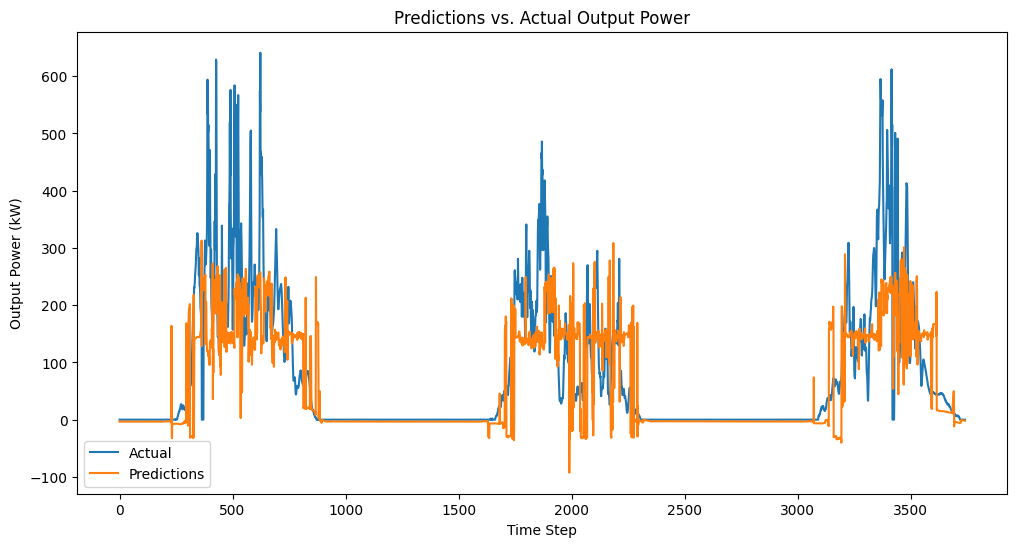

In [ ]:
# Plot the predictions against the actual targets
plt.figure(figsize=(12, 6))
plt.plot(targets[:,0], label='Actual')
plt.plot(predictions[:,0], label='Predictions')
plt.xlabel('Time Step')
plt.ylabel('Output Power (kW)')
plt.title('Predictions vs. Actual Output Power')
plt.legend()
plt.show()

In [17]:
predictions = predictions.reshape(-1)
targets = targets.reshape(-1)

predictions.shape, targets.shape

((112260,), (112260,))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(targets, predictions), mean_absolute_error(targets, predictions), r2_score(targets, predictions)

(7121.78857967281, 50.487032627143726, 0.47307635918756874)

In [ ]:
np.mean(2*abs(targets-predictions)/abs(targets+predictions))

2.615020858943052

In [20]:
model.save("solar_forecaster.h5")